## Student Performance Indicator


#### Life cycle of Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


### 2) Data Collection
- Dataset Source - synthetic dataset
- The data consists of 8 column and 5000 rows.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv(r'data\synthetic_student_scores.csv')

#### Show Top 5 Records

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score,math_score
0,female,group C,some high school,free/reduced,none,83,86,81
1,male,group C,master's degree,standard,none,69,67,57
2,female,group D,master's degree,free/reduced,completed,85,83,60
3,female,group C,bachelor's degree,free/reduced,none,87,93,94
4,female,group E,some college,free/reduced,none,83,80,71


#### Shape of the dataset

In [4]:
df.shape

(5000, 8)

### 2.2 Dataset information

- gender : sex of students  -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced) 
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [5]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
reading_score                  0
writing_score                  0
math_score                     0
dtype: int64

#### There are no missing values in the data set

### 3.2 Check Duplicates

In [6]:
df[df.duplicated()]

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score,math_score
3539,female,group E,some college,free/reduced,completed,75,73,71
3874,male,group C,high school,free/reduced,none,100,100,71
4760,female,group C,bachelor's degree,standard,none,74,76,63


In [7]:
df=df.drop_duplicates()

In [8]:
df.shape

(4997, 8)

### 3.3 Check data types

In [9]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4997 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       4997 non-null   object
 1   race_ethnicity               4997 non-null   object
 2   parental_level_of_education  4997 non-null   object
 3   lunch                        4997 non-null   object
 4   test_preparation_course      4997 non-null   object
 5   reading_score                4997 non-null   int64 
 6   writing_score                4997 non-null   int64 
 7   math_score                   4997 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 351.4+ KB


### 3.4 Checking the number of unique values of each column

In [10]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
reading_score                  82
writing_score                  83
math_score                     95
dtype: int64

### 3.5 Check statistics of data set

In [11]:
df.describe()

,reading_score,writing_score,math_score
count,4997.000000,4997.000000,4997.000000
mean,69.497098,69.021013,55.027817
std,14.668673,15.478560,15.402325
min,3.000000,2.000000,4.000000
25%,60.000000,59.000000,44.000000
50%,69.000000,69.000000,55.000000
75%,79.000000,80.000000,66.000000
max,100.000000,100.000000,100.000000


#### Insight
- Mean scores differ across subjects: **Reading (69.5)** and **Writing (69.0)** are higher than **Math (55.0)**, suggesting students generally perform better in language-related areas.
- The **standard deviation is approximately 15** across all subjects, indicating a **similar spread or variability** in student performance.
- **Math scores range from 4 to 100**, while **Reading (3–100)** and **Writing (2–100)** also cover a wide span, with **lower minimum values in language subjects**, pointing toward **possible outliers** or **students struggling significantly**.
- The **interquartile range (IQR)** is around **19–21 points** for all subjects, showing a **moderately consistent distribution** of scores.
- The **lower extreme scores** (e.g., 2 in writing, 3 in reading) may require **further validation or cleaning**, as they could indicate **either genuine low scores or data quality issues**.


### 3.7 Exploring Data

In [12]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score,math_score
0,female,group C,some high school,free/reduced,none,83,86,81
1,male,group C,master's degree,standard,none,69,67,57
2,female,group D,master's degree,free/reduced,completed,85,83,60
3,female,group C,bachelor's degree,free/reduced,none,87,93,94
4,female,group E,some college,free/reduced,none,83,80,71


In [13]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group C' 'group D' 'group E' 'group B' 'group A']
Categories in'parental level of education' variable: ['some high school' "master's degree" "bachelor's degree" 'some college'
 'high school' "associate's degree"]
Categories in 'lunch' variable:      ['free/reduced' 'standard']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [14]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['reading_score', 'writing_score', 'math_score']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [15]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score,math_score
0,female,group C,some high school,free/reduced,none,83,86,81
1,male,group C,master's degree,standard,none,69,67,57


### 3.8 Adding columns for "Total Score" and "Average"

In [16]:
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score,math_score,total score,average
0,female,group C,some high school,free/reduced,none,83,86,81,250,83.333333
1,male,group C,master's degree,standard,none,69,67,57,193,64.333333
2,female,group D,master's degree,free/reduced,completed,85,83,60,228,76.000000
3,female,group C,bachelor's degree,free/reduced,none,87,93,94,274,91.333333
4,female,group E,some college,free/reduced,none,83,80,71,234,78.000000


In [17]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 2
Number of students with full marks in Writing: 159
Number of students with full marks in Reading: 126


In [18]:
reading_less_than20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_than20 = df[df['writing_score'] <= 20]['average'].count()
math_less_than20 = df[df['math_score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_than20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_than20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_than20}')

Number of students with less than 20 marks in Maths: 61
Number of students with less than 20 marks in Writing: 6
Number of students with less than 20 marks in Reading: 3


#####  Insights
 - From above values we get students have performed the worst in Maths 
 - Best performance is in reading section

### 4. Exploring Data ( Visualization )
#### 4.1 Visualize average score distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)

#### 4.1.1 Histogram & KDE

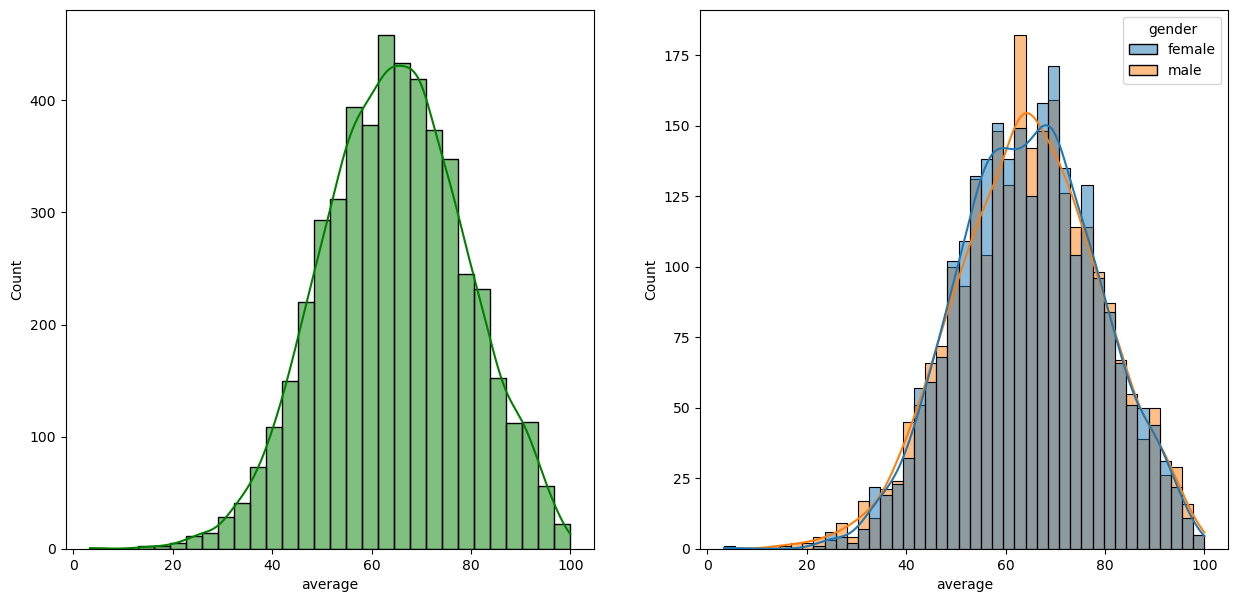

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

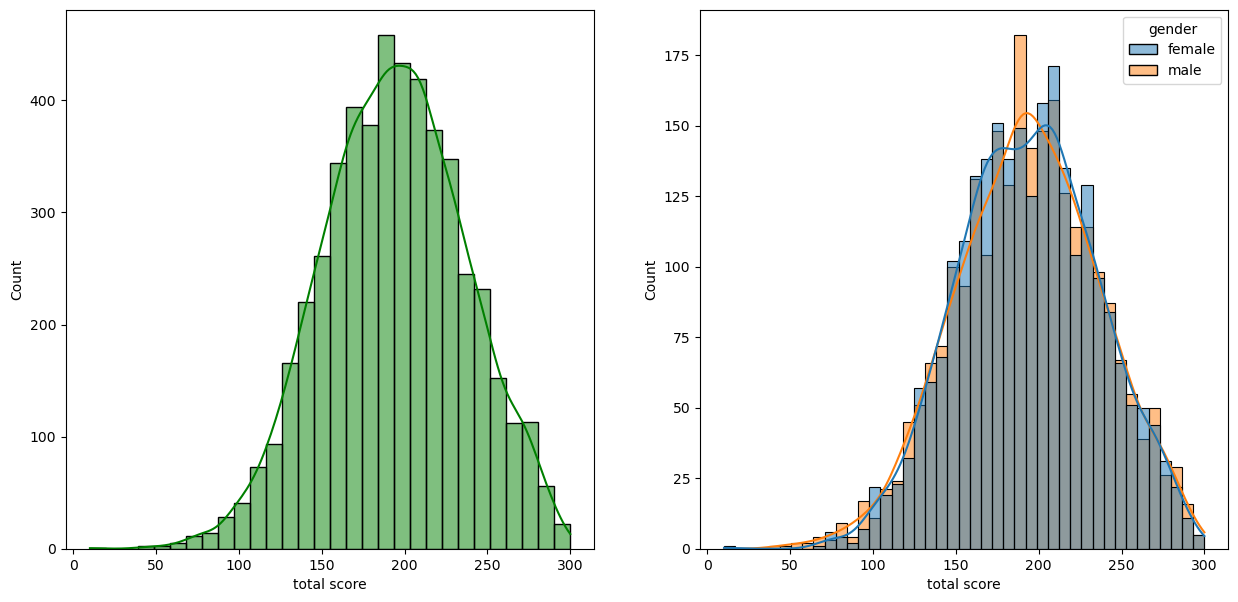

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender')
plt.show()

##### Insights
- The overall distribution of "total score" is roughly symmetrical and bell-shaped, centered around 200.
- When separated by gender, both female and male students exhibit a similar distribution of "total score," with peaks around the same score (approximately 200).
- There is significant overlap in the total scores between female and male students, suggesting that the performance distributions are quite similar for both genders, rather than one consistently outperforming the other.

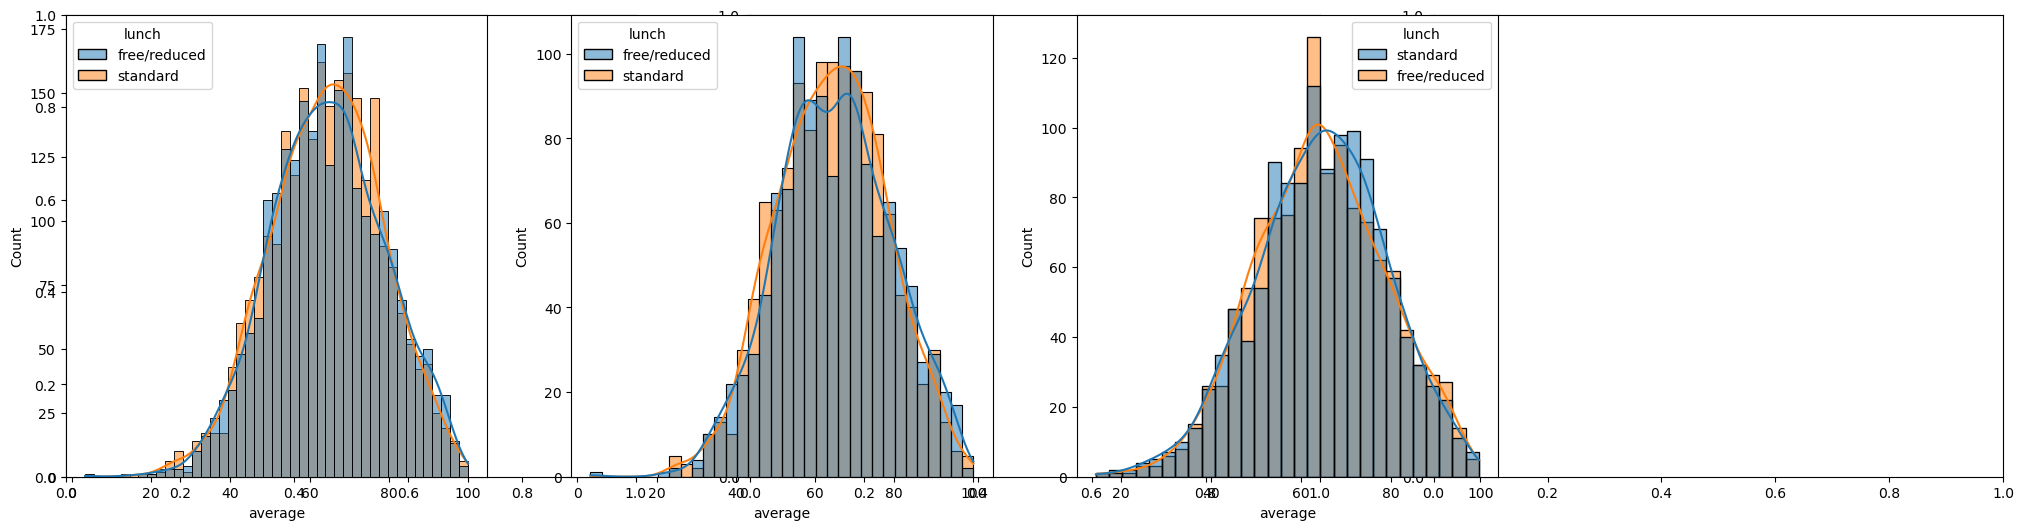

In [21]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

##### Insights
- Students who have a standard lunch tend to have slightly higher average exam scores compared to students who have a free/reduced lunch. The distribution of average scores for students with standard lunch appears to be shifted towards higher values.

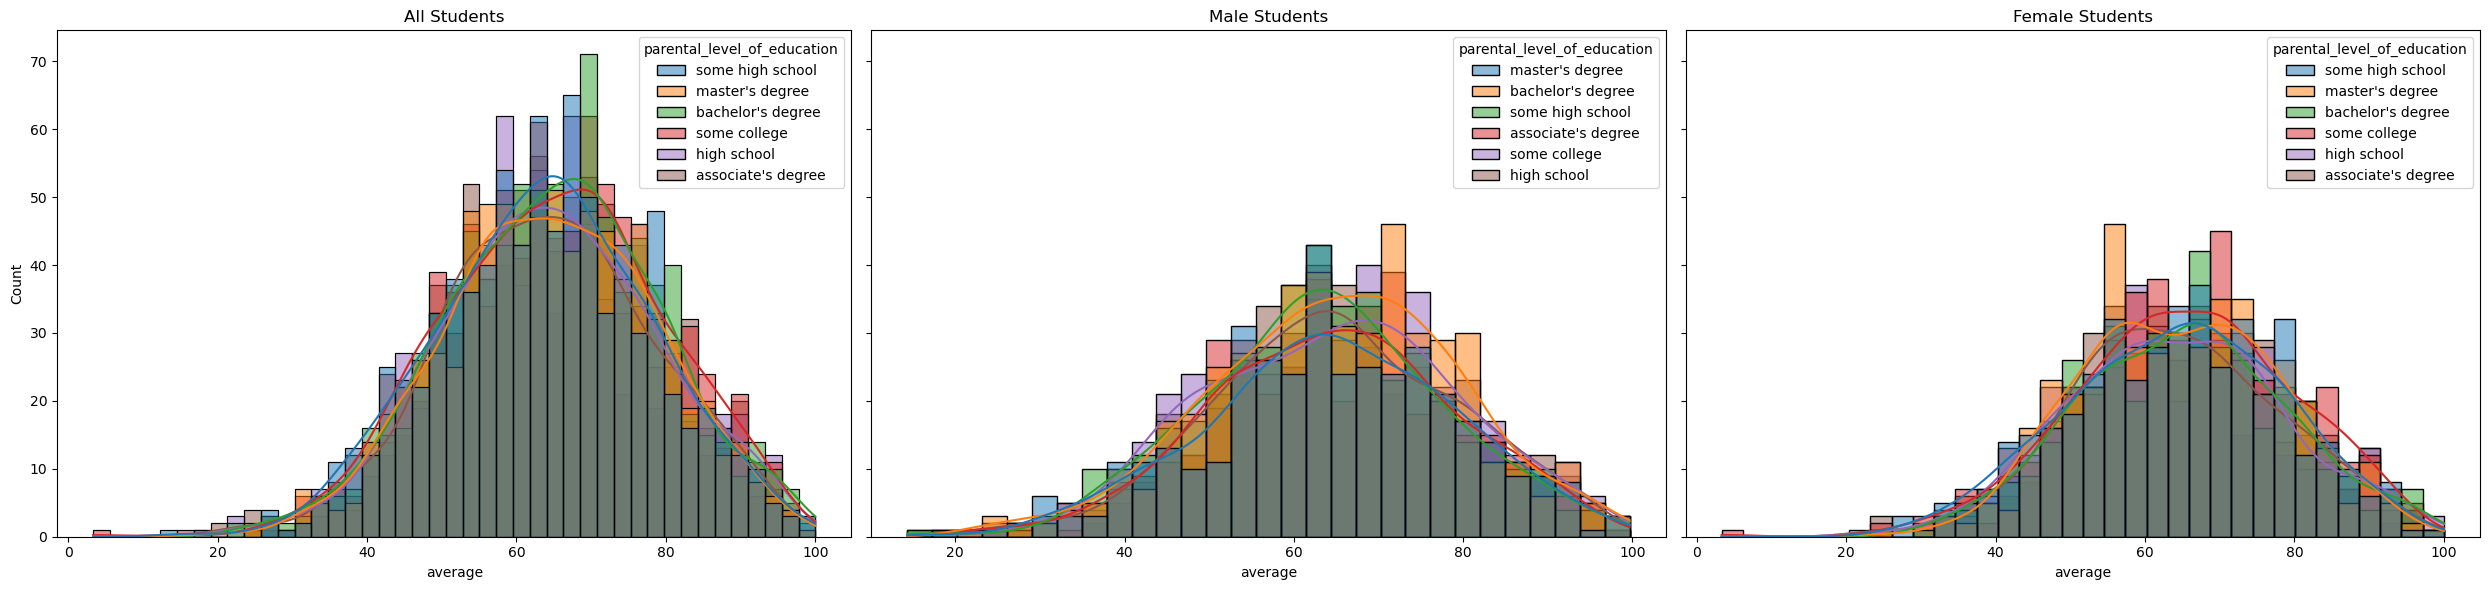

In [22]:

fig, axes = plt.subplots(1, 3, figsize=(25, 6), sharey=True)

# Plot 1: All genders
sns.histplot(data=df, x='average', kde=True, hue='parental_level_of_education', ax=axes[0])
axes[0].set_title('All Students')

# Plot 2: Male students
sns.histplot(data=df[df.gender == 'male'], x='average', kde=True, hue='parental_level_of_education', ax=axes[1])
axes[1].set_title('Male Students')

# Plot 3: Female students
sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='parental_level_of_education', ax=axes[2])
axes[2].set_title('Female Students')

plt.tight_layout()
plt.show()

##### Insights
- In general, there appears to be a positive correlation between the parental level of education and student performance in exams. Students whose parents have higher educational qualifications (e.g., bachelor's degree, master's degree, associate's degree) tend to achieve higher average scores, as indicated by the rightward shift of their score distributions.
- For male students, a similar trend is observed where higher parental education levels are associated with better exam performance. The distributions for parents with bachelor's, master's, and associate's degrees show a tendency towards higher average scores.
- For female students, there is also a noticeable effect of parental education on exam performance. Female students whose parents have higher levels of education generally tend to perform better in exams, with their score distributions shifting towards higher average scores as parental education increases.

In [23]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score,math_score,total score,average
0,female,group C,some high school,free/reduced,none,83,86,81,250,83.333333
1,male,group C,master's degree,standard,none,69,67,57,193,64.333333
2,female,group D,master's degree,free/reduced,completed,85,83,60,228,76.000000
3,female,group C,bachelor's degree,free/reduced,none,87,93,94,274,91.333333
4,female,group E,some college,free/reduced,none,83,80,71,234,78.000000


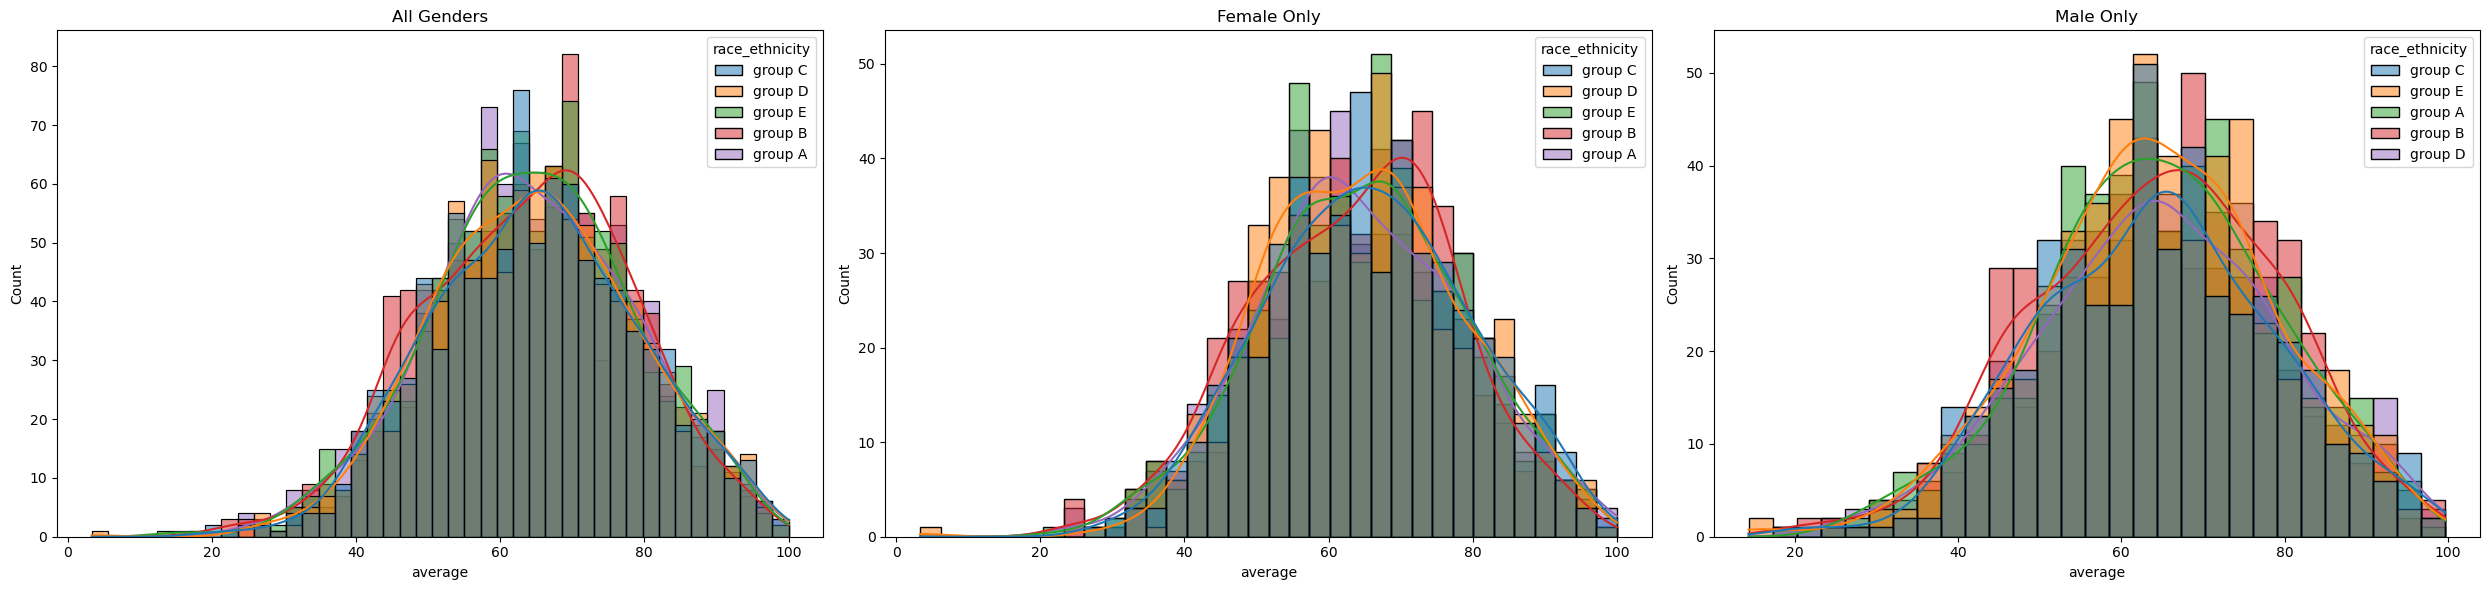

In [24]:
fig, axs = plt.subplots(1, 3, figsize=(25, 6))

sns.histplot(data=df, x='average', kde=True, hue='race_ethnicity', ax=axs[0])
axs[0].set_title('All Genders')

sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='race_ethnicity', ax=axs[1])
axs[1].set_title('Female Only')

sns.histplot(data=df[df.gender == 'male'], x='average', kde=True, hue='race_ethnicity', ax=axs[2])
axs[2].set_title('Male Only')

plt.tight_layout()
plt.show()

##### Insights
- Across all genders, students from 'group E' and 'group D' generally tend to achieve higher average scores compared to other racial/ethnic groups, as their score distributions are notably shifted to the right.
- For female students, 'group E' and 'group D' also exhibit a tendency towards higher average scores, indicating better academic performance within these groups. Conversely, 'group A' and 'group B' female students show distributions skewed towards lower average scores.
- Male students show a similar pattern, with 'group E' and 'group D' performing better on average. 'Group A' and 'group B' male students tend to have lower average scores. This suggests that the observed differences in performance across racial/ethnic groups are consistent regardless of gender.

#### 4.2 Maximumum score of students in all three subjects

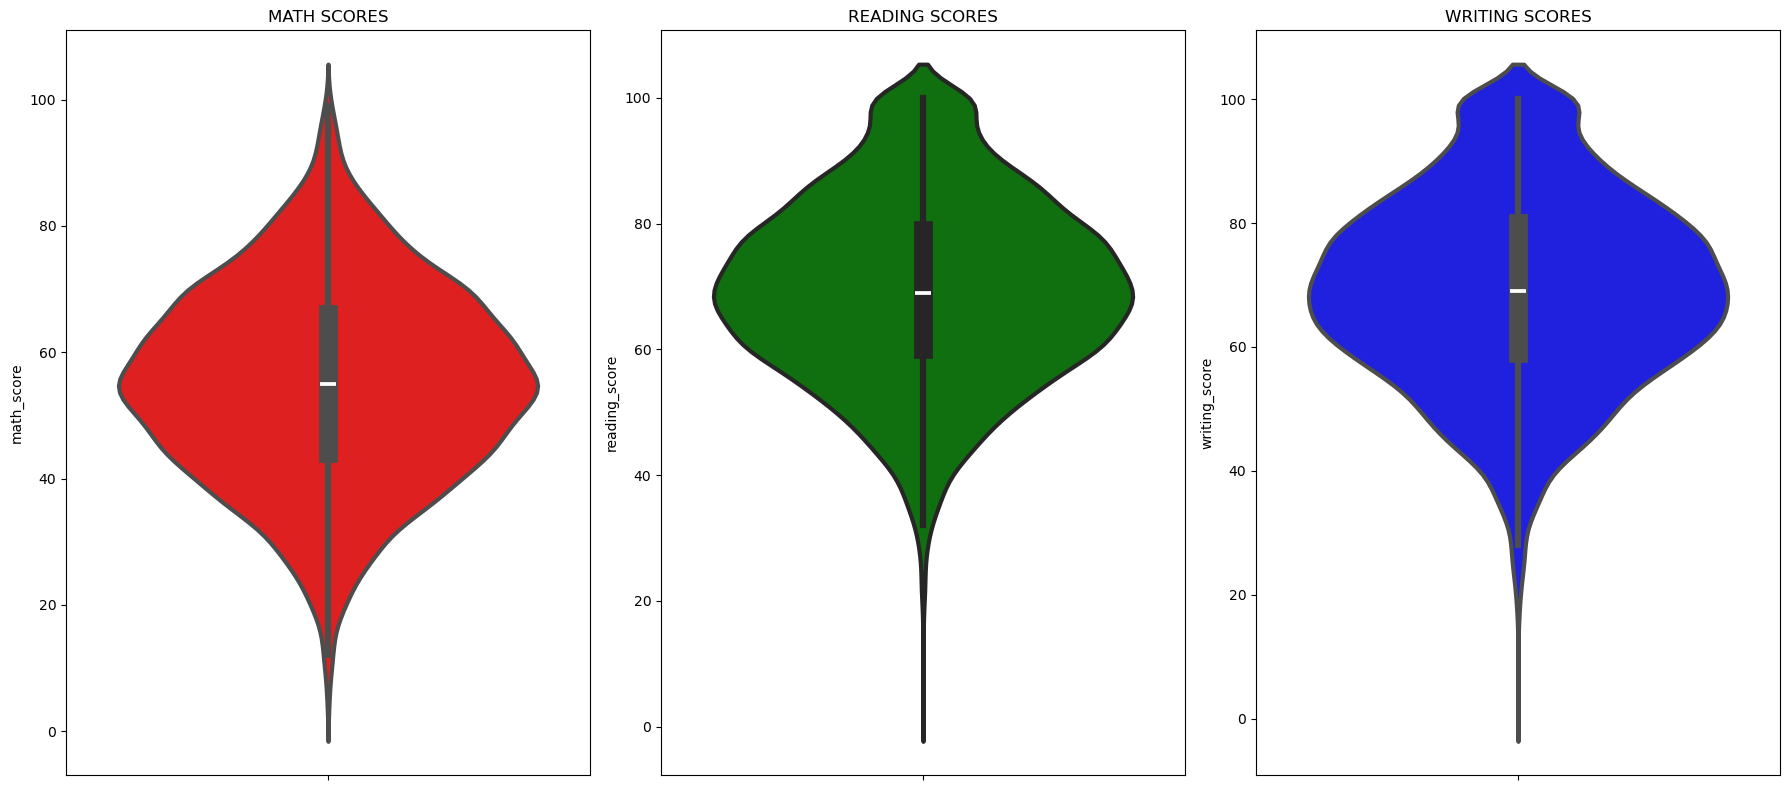

In [25]:
plt.figure(figsize=(18,8))

plt.subplot(1, 3, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score', data=df, color='red', linewidth=3)

plt.subplot(1, 3, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score', data=df, color='green', linewidth=3)

plt.subplot(1, 3, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score', data=df, color='blue', linewidth=3)

plt.tight_layout()
plt.show()


#### Insights
- From the above three plots, it is visible that the majority of students score approximately between 50 and 80 in Math.
- In both Reading and Writing, the bulk of the scores for most students falls roughly between 60 and 80.

#### 4.3 Multivariate analysis using pieplot

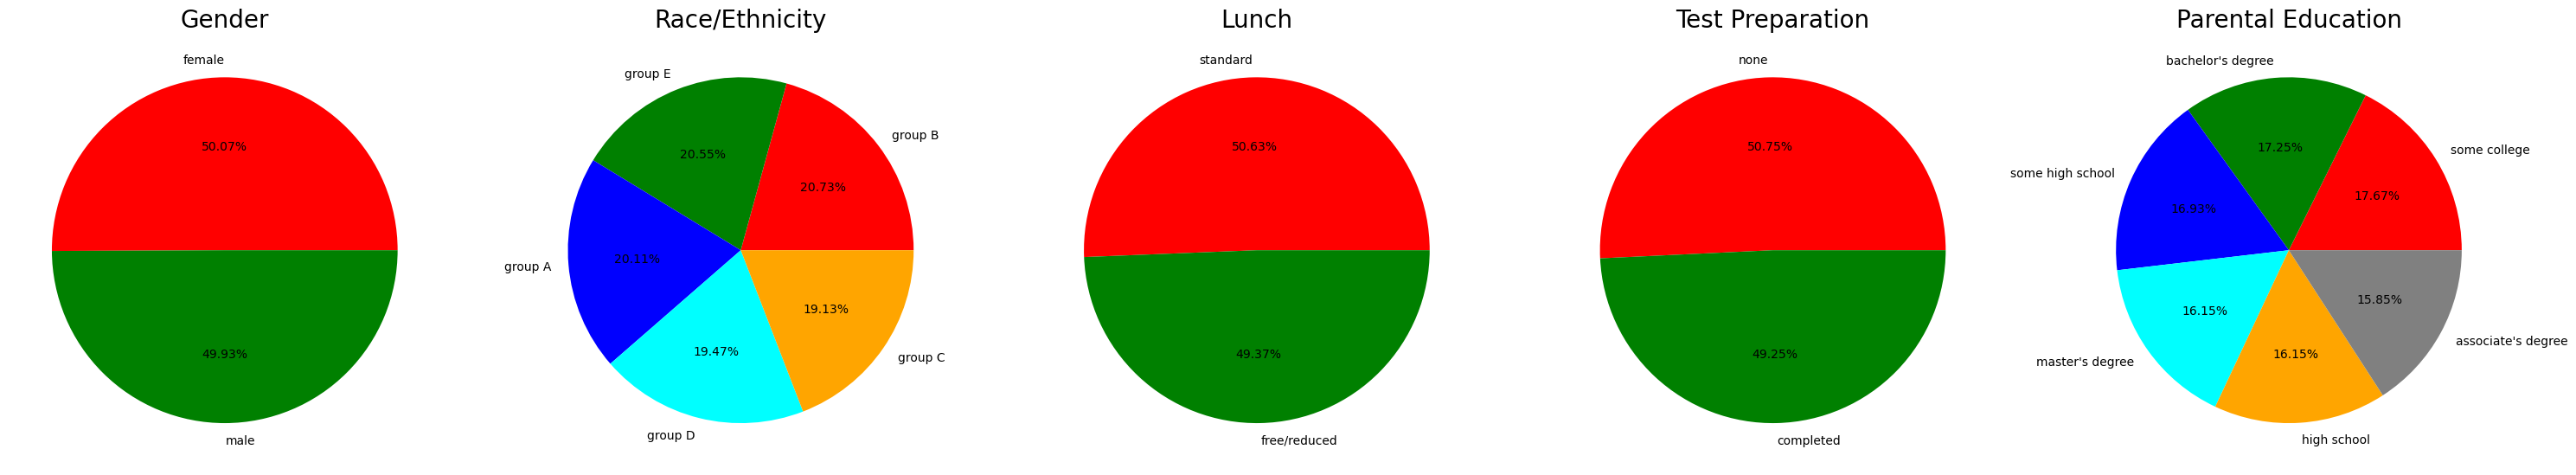

In [26]:
plt.rcParams['figure.figsize'] = (30, 12)

# Gender
plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = size.index
colors = ['red', 'green'][:len(size)]
plt.pie(size, labels=labels, colors=colors, autopct='%.2f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')

# Race/Ethnicity
plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = size.index
colors = ['red', 'green', 'blue', 'cyan', 'orange'][:len(size)]
plt.pie(size, labels=labels, colors=colors, autopct='%.2f%%')
plt.title('Race/Ethnicity', fontsize=20)
plt.axis('off')

# Lunch
plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = size.index
colors = ['red', 'green'][:len(size)]
plt.pie(size, labels=labels, colors=colors, autopct='%.2f%%')
plt.title('Lunch', fontsize=20)
plt.axis('off')

# Test Preparation Course
plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = size.index
colors = ['red', 'green'][:len(size)]
plt.pie(size, labels=labels, colors=colors, autopct='%.2f%%')
plt.title('Test Preparation', fontsize=20)
plt.axis('off')

# Parental Level of Education
plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = size.index
colors = ['red', 'green', 'blue', 'cyan', 'orange', 'grey'][:len(size)]
plt.pie(size, labels=labels, colors=colors, autopct='%.2f%%')
plt.title('Parental Education', fontsize=20)
plt.axis('off')

plt.tight_layout()
plt.show()

##### Insights
- The number of male and female students is almost equally distributed.
- Among the racial/ethnic groups, 'group B' has the largest number of students, closely followed by 'group E' and 'group A'. 'Group C' has the smallest number of students.
- A slightly higher proportion of students have a 'standard' lunch compared to 'free/reduced'.
- The majority of students have not enrolled in any test preparation course.
- The highest proportion of students have parents whose education is 'some high school', followed by 'some college', and then 'bachelor's degree'.

#### 4.4 Feature Wise Visualization
#### 4.4.1 GENDER COLUMN
- How is distribution of Gender ?
- Is gender has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

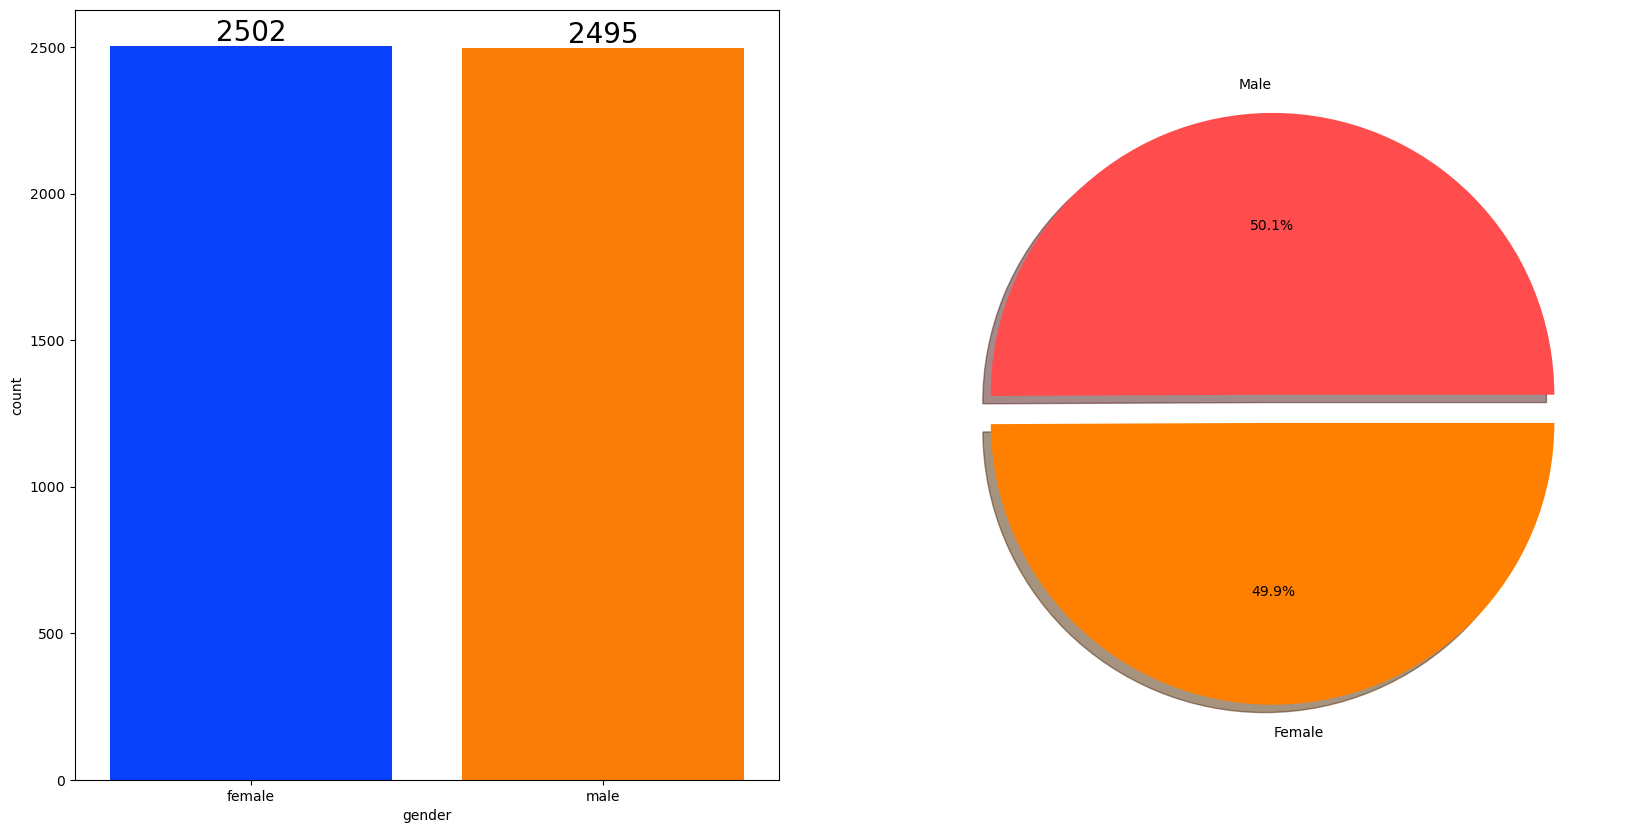

In [27]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

#### Insights
- The dataset has a very balanced representation of gender, with female students accounting for approximately 50.1% (2502 individuals) and male students for approximately 49.9% (2495 individuals). The counts for both genders are nearly equal.

#### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? ) 

In [28]:
gender_group = df.groupby('gender')[['math_score', 'reading_score', 'writing_score', 'total score', 'average']].mean()
gender_group

,math_score,reading_score,writing_score,total score,average
gender,,,,,
female,55.191047,69.536771,69.029177,193.756994,64.585665
male,54.864128,69.457315,69.012826,193.334269,64.444756


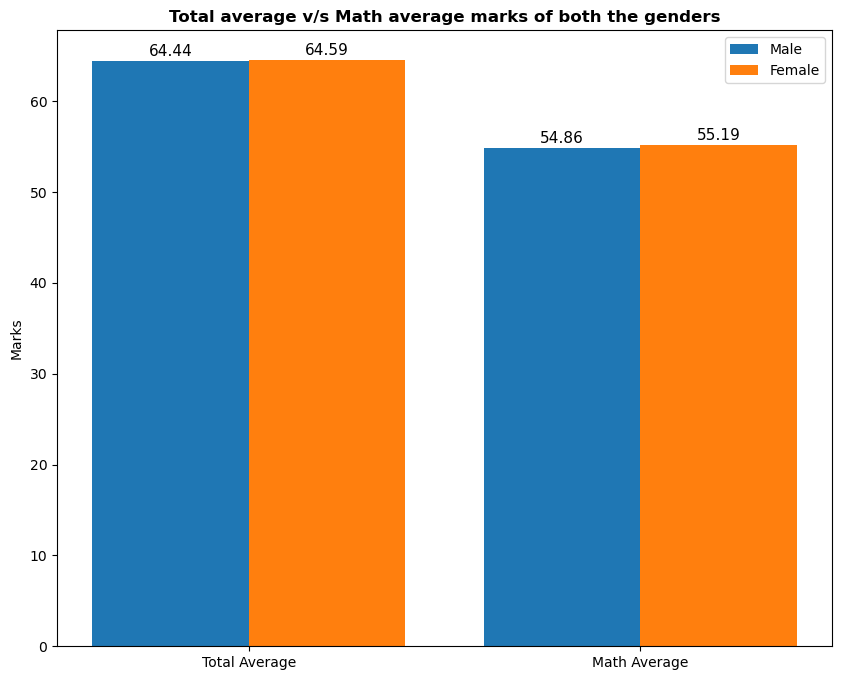

In [29]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
for i in range(len(X)):
    plt.text(X_axis[i] - 0.2, male_scores[i] + 0.5, f'{male_scores[i]:.2f}', ha='center', fontsize=11)
    plt.text(X_axis[i] + 0.2, female_scores[i] + 0.5, f'{female_scores[i]:.2f}', ha='center', fontsize=11)

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

#### Insights
- On an average, female students show a very slightly higher 'Total Average' score (64.59) compared to male students (64.44).
- For 'Math Average' scores, female students (55.19) also show a slightly higher average compared to male students (54.86).

#### 4.4.2 RACE/EHNICITY COLUMN
- How is Group wise distribution ?
- Is Race/Ehnicity has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

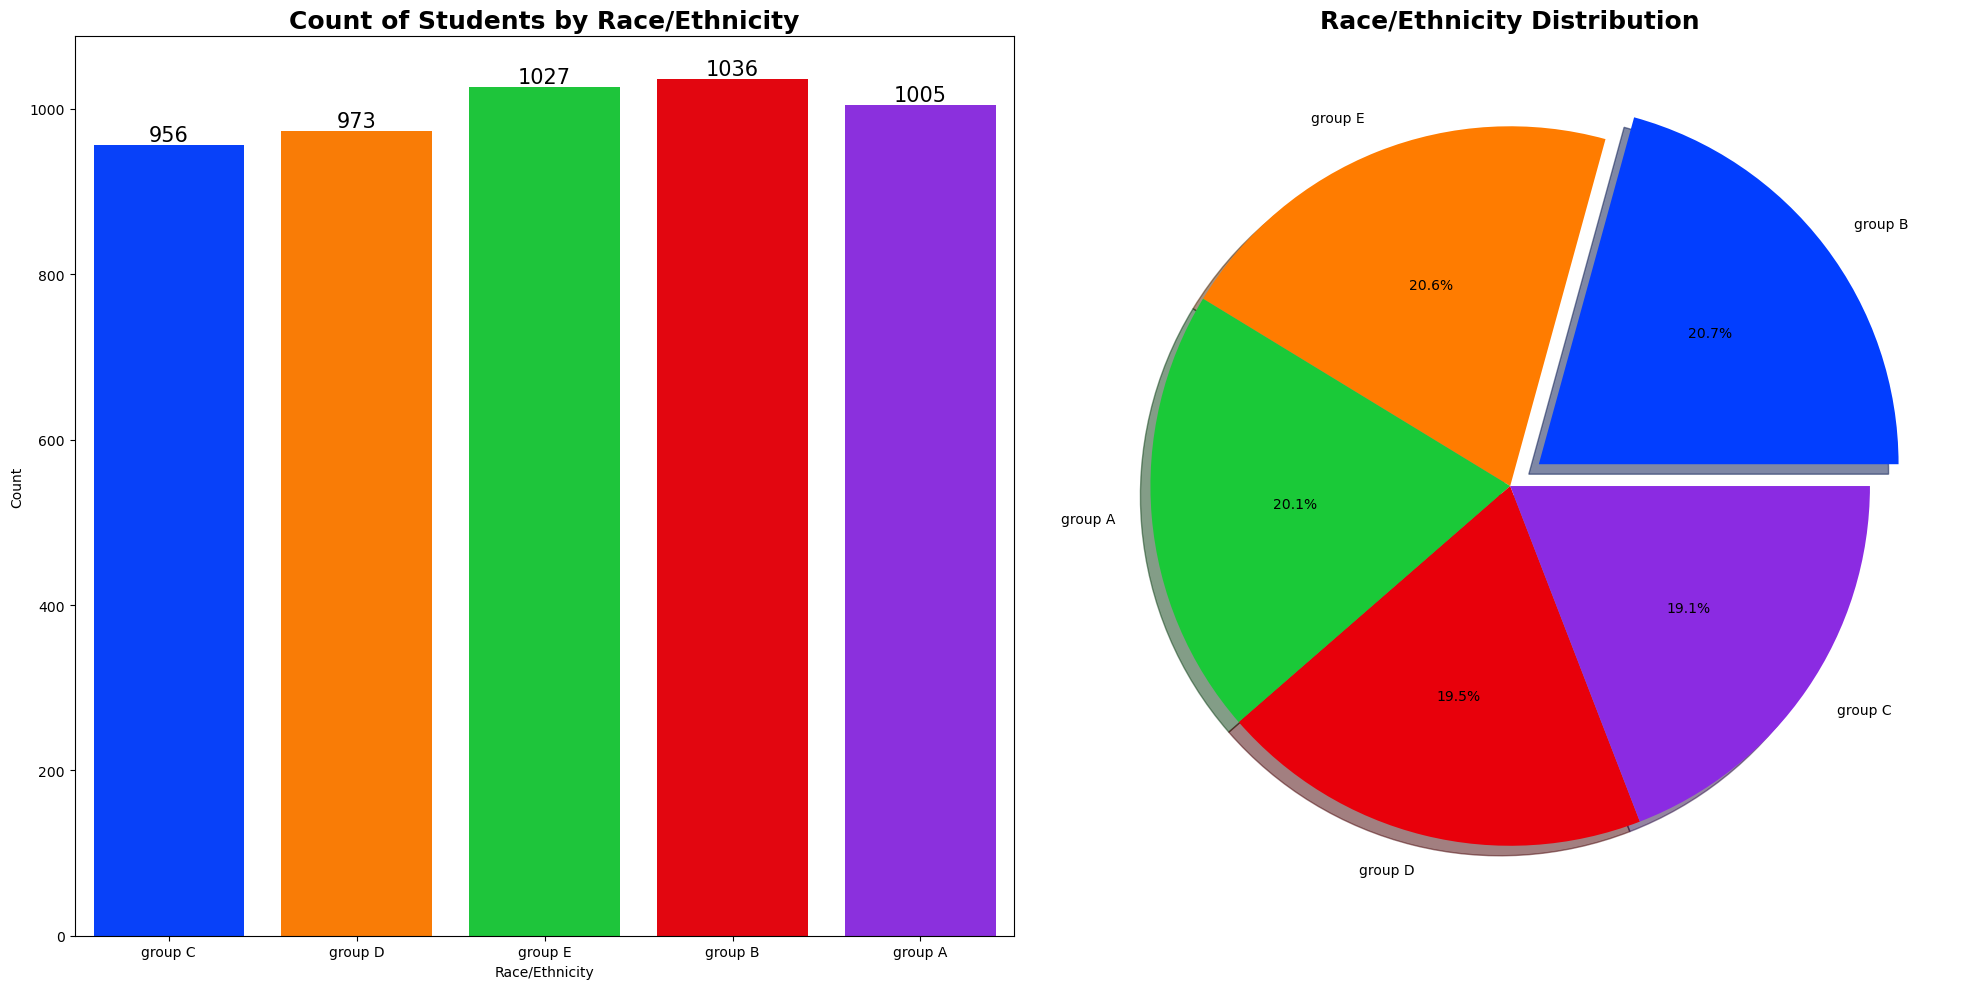

In [30]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))

# Countplot
sns.countplot(x='race_ethnicity', data=df, palette='bright', ax=ax[0], saturation=0.95)
ax[0].set_title("Count of Students by Race/Ethnicity", fontsize=18, fontweight='bold')
ax[0].set_xlabel("Race/Ethnicity")
ax[0].set_ylabel("Count")

# Add bar labels
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)

# Pie chart on second axis
race_counts = df['race_ethnicity'].value_counts()
ax[1].pie(
    x=race_counts,
    labels=race_counts.index,
    explode=[0.1] + [0]*(len(race_counts)-1),
    autopct='%1.1f%%',
    shadow=True,
    colors=sns.color_palette('bright')
)
ax[1].set_title("Race/Ethnicity Distribution", fontsize=18, fontweight='bold')

plt.tight_layout()
plt.show()


#### Insights
- 'Group B' has the highest number of students, accounting for 1036 individuals or 20.7% of the total.
- 'Group C' has the lowest number of students, with 956 individuals or 19.1% of the total.
- The distribution of students across all racial/ethnic groups is relatively balanced, with each group representing approximately 19% to 21% of the total student population.

#### BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

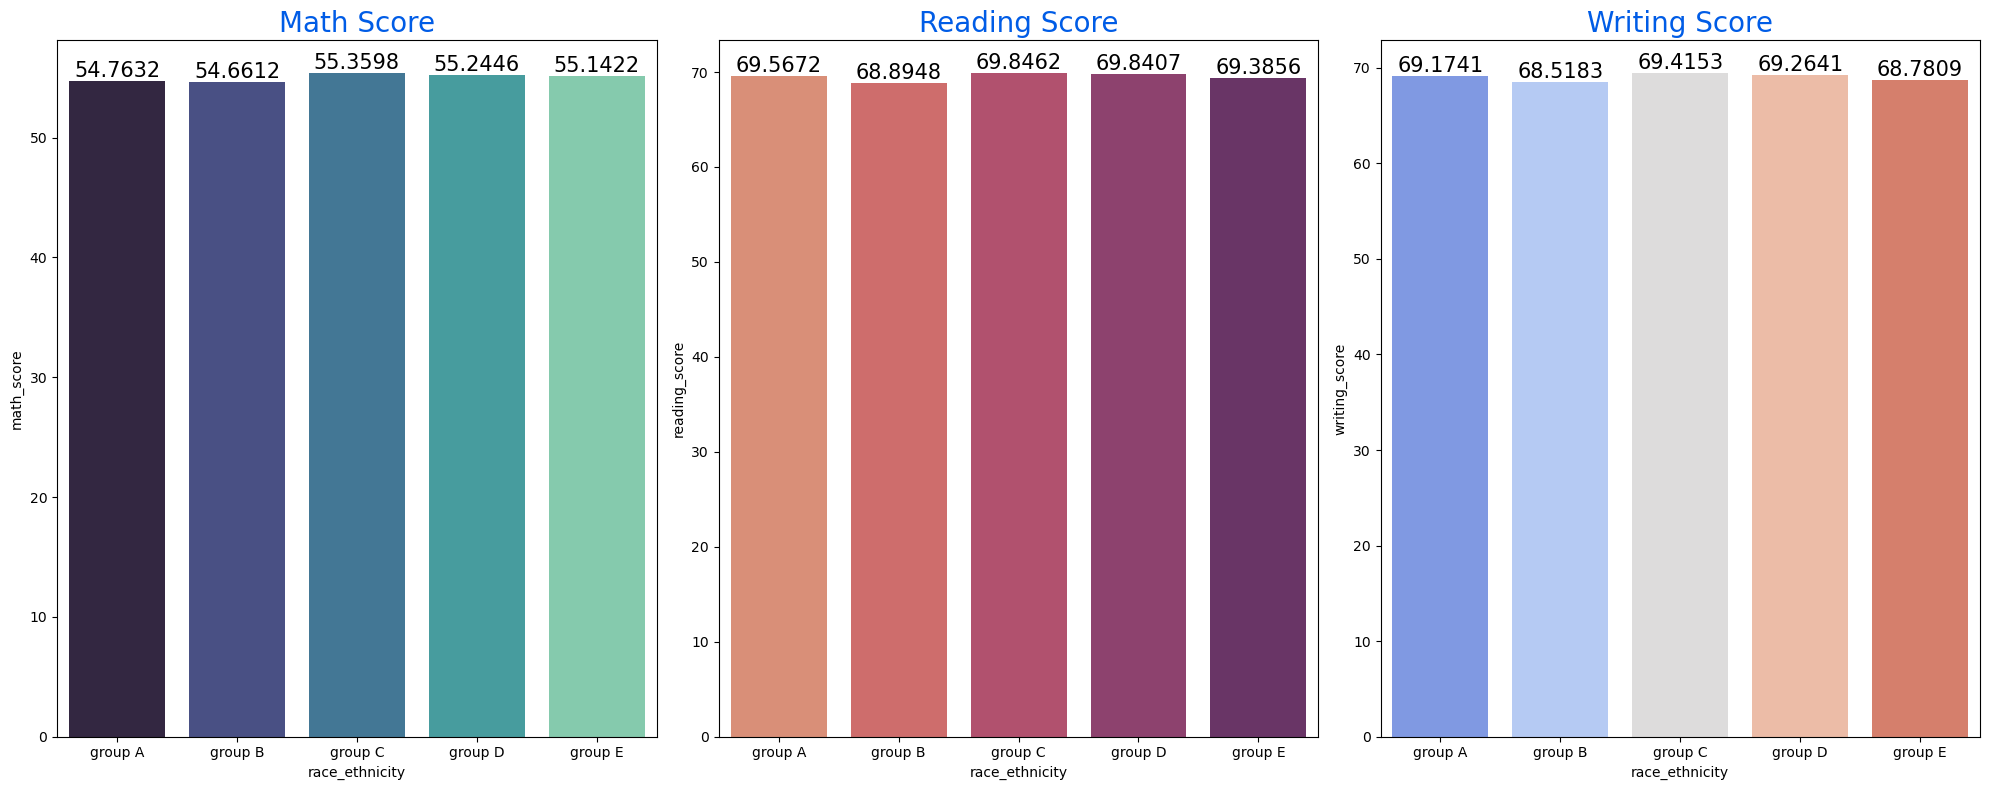

In [31]:
grouped = df.groupby('race_ethnicity')[['math_score', 'reading_score', 'writing_score']].mean()

f, ax = plt.subplots(1, 3, figsize=(20, 8))

# Math Score
sns.barplot(x=grouped.index, y=grouped['math_score'], palette='mako', ax=ax[0])
ax[0].set_title('Math Score', color='#005ce6', size=20)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)

# Reading Score
sns.barplot(x=grouped.index, y=grouped['reading_score'], palette='flare', ax=ax[1])
ax[1].set_title('Reading Score', color='#005ce6', size=20)
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=15)

# Writing Score
sns.barplot(x=grouped.index, y=grouped['writing_score'], palette='coolwarm', ax=ax[2])
ax[2].set_title('Writing Score', color='#005ce6', size=20)
for container in ax[2].containers:
    ax[2].bar_label(container, color='black', size=15)

plt.tight_layout()
plt.show()

#### Insights
- 'Group C' students consistently have the highest average scores across Math, Reading, and Writing.
- 'Group B' students consistently have the lowest average scores across Math, Reading, and Writing.
- While there are minor variations, the average scores across different `race_ethnicity` groups do not show extremely large differences, suggesting that while some groups perform slightly better or worse, the overall range of averages is relatively narrow.

#### 4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN
- What is educational background of student's parent ?
- Is parental education has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

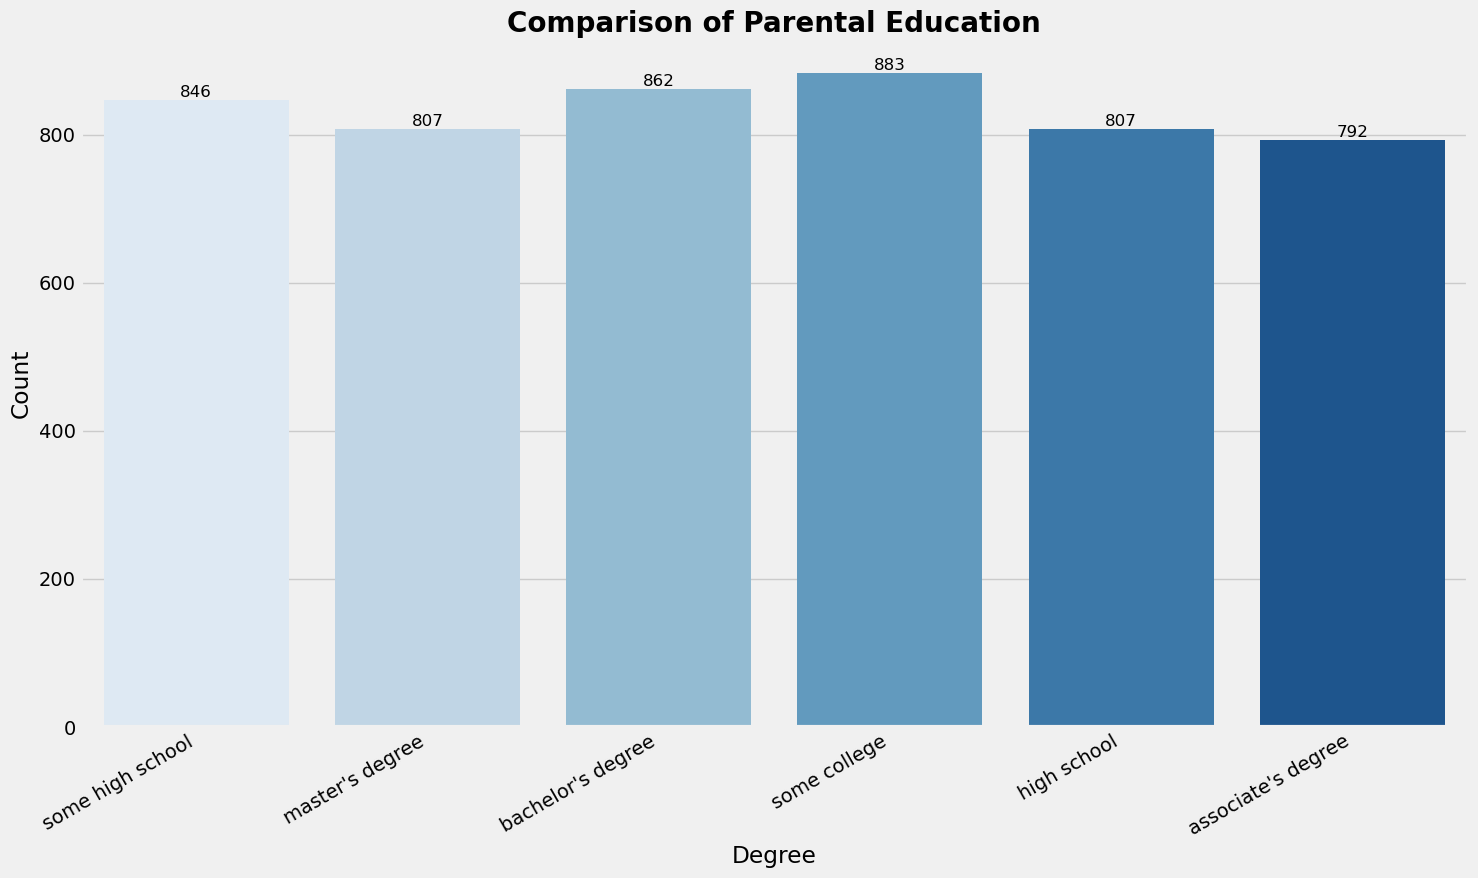

In [32]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')

ax = sns.countplot(x='parental_level_of_education', data=df, palette='Blues')

# Add count labels
for container in ax.containers:
    ax.bar_label(container, fontsize=12)

# Labels and title
plt.title('Comparison of Parental Education', fontweight='bold', fontsize=20)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

#### Insights
- The highest number of parents have a 'some college' level of education (883).
- The lowest number of parents have an 'associate's degree' (792).
- The distribution of parental education levels is relatively varied, with 'bachelor's degree' (862) and 'some high school' (846) also having significant counts.

#### BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

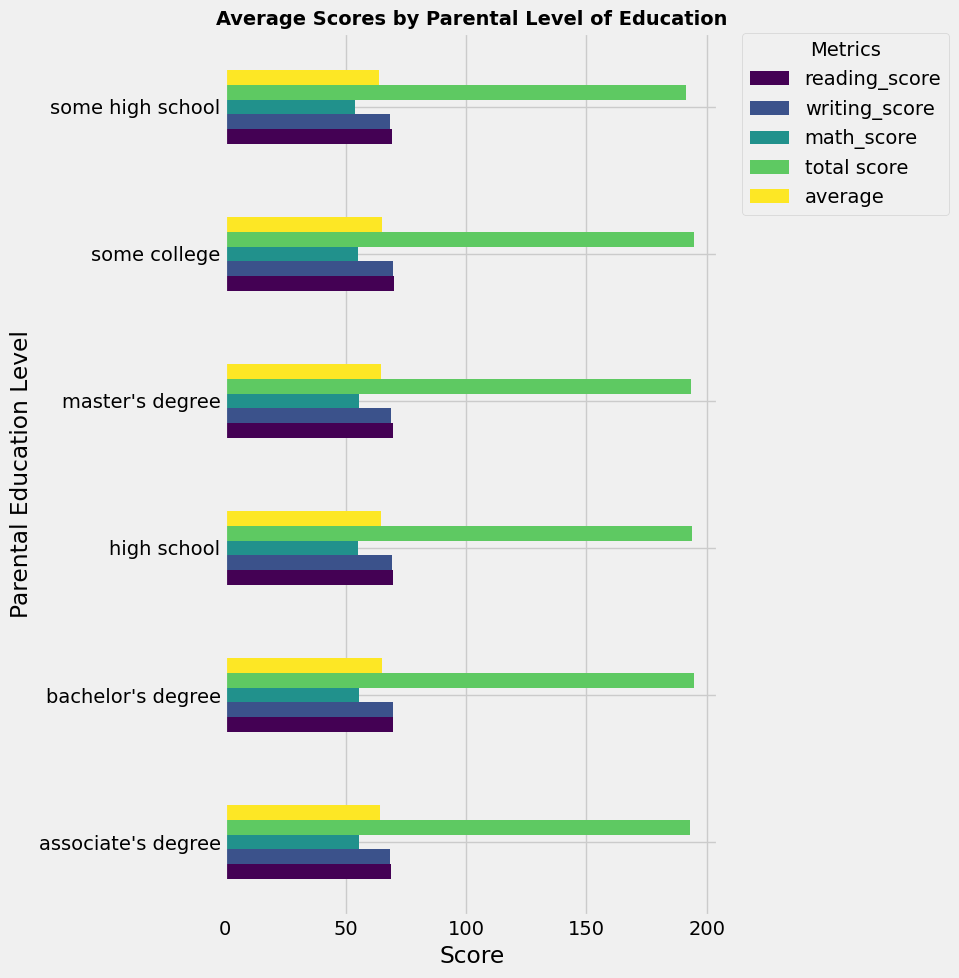

In [33]:
# Group by parental education and take mean of numeric columns
df.groupby('parental_level_of_education') \
  .mean(numeric_only=True) \
  .plot(kind='barh', figsize=(10, 10), colormap='viridis')

## legend
plt.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title("Average Scores by Parental Level of Education", fontsize=14, fontweight='bold')
plt.xlabel("Score")
plt.ylabel("Parental Education Level")
plt.tight_layout()
plt.show()

#### Insights
- Students whose parents have a 'master's degree' or 'bachelor's degree' generally achieve higher average scores across all subjects compared to students whose parents have lower educational qualifications.
- While students with parents holding an 'associate's degree' perform better than those with parents having 'high school' or 'some high school' education, their scores are not as high as those with parents holding 'master's' or 'bachelor's degrees'.
- There is a general trend showing that as the parental level of education increases, the average scores of students also tend to increase.

#### 4.4.4 LUNCH COLUMN 
- Which type of lunch is most common amoung students ?
- What is the effect of lunch type on test results?


#### UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

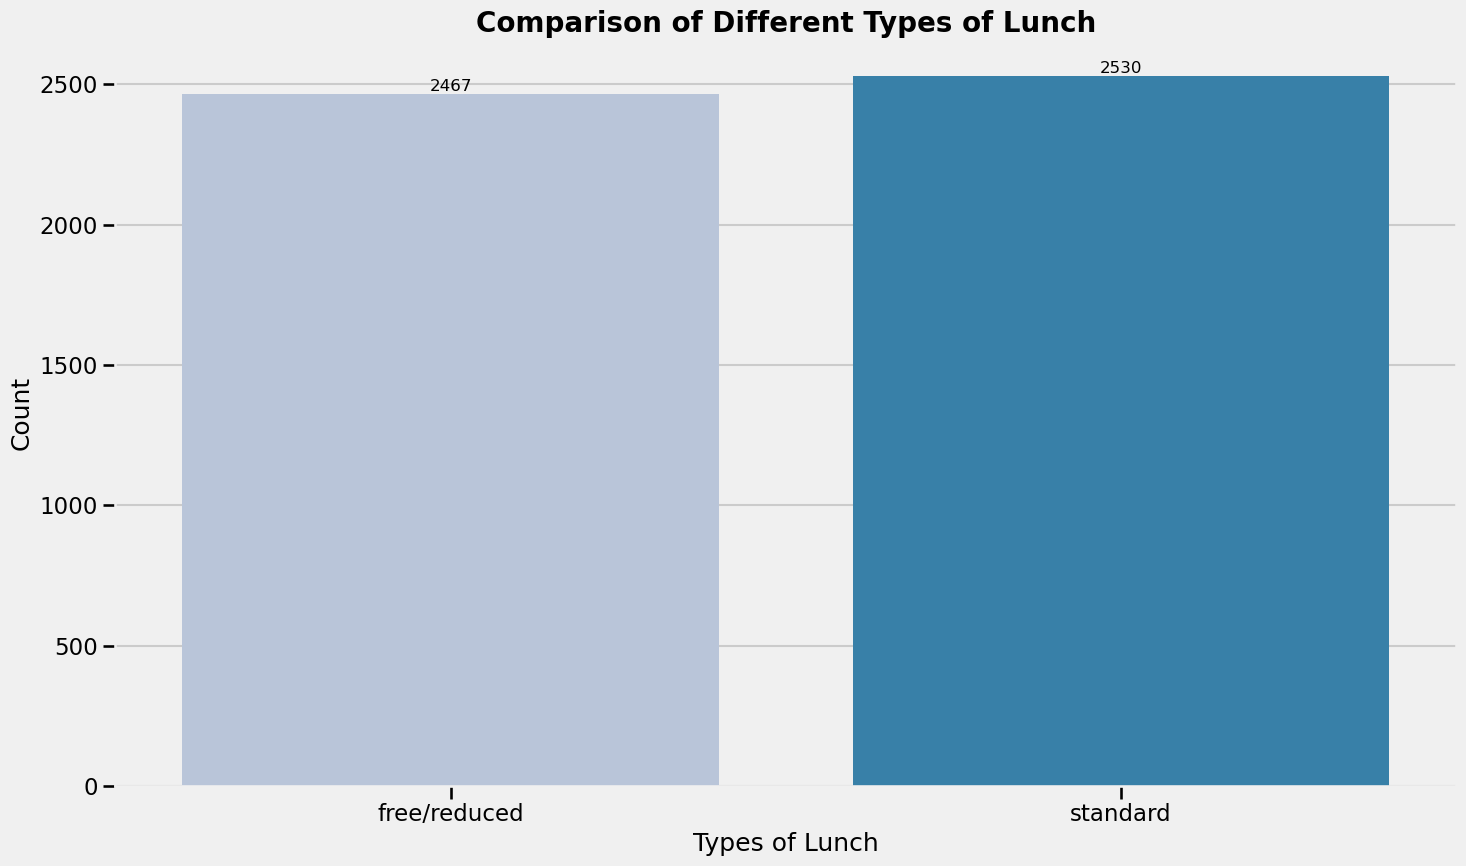

In [34]:
plt.rcParams['figure.figsize'] = (15, 9)
sns.set_context("talk") 
ax = sns.countplot(x='lunch', data=df, palette='PuBu')

plt.title('Comparison of Different Types of Lunch', fontweight='bold', fontsize=20)
plt.xlabel('Types of Lunch')
plt.ylabel('Count')

# Add labels
for container in ax.containers:
    ax.bar_label(container, fontsize=12)

plt.tight_layout()
plt.show()


#### Insights 
- Students being served Standard lunch was more than free lunch 

#### BIVARIATE ANALYSIS (  Is lunch type intake has any impact on student's performance ? )

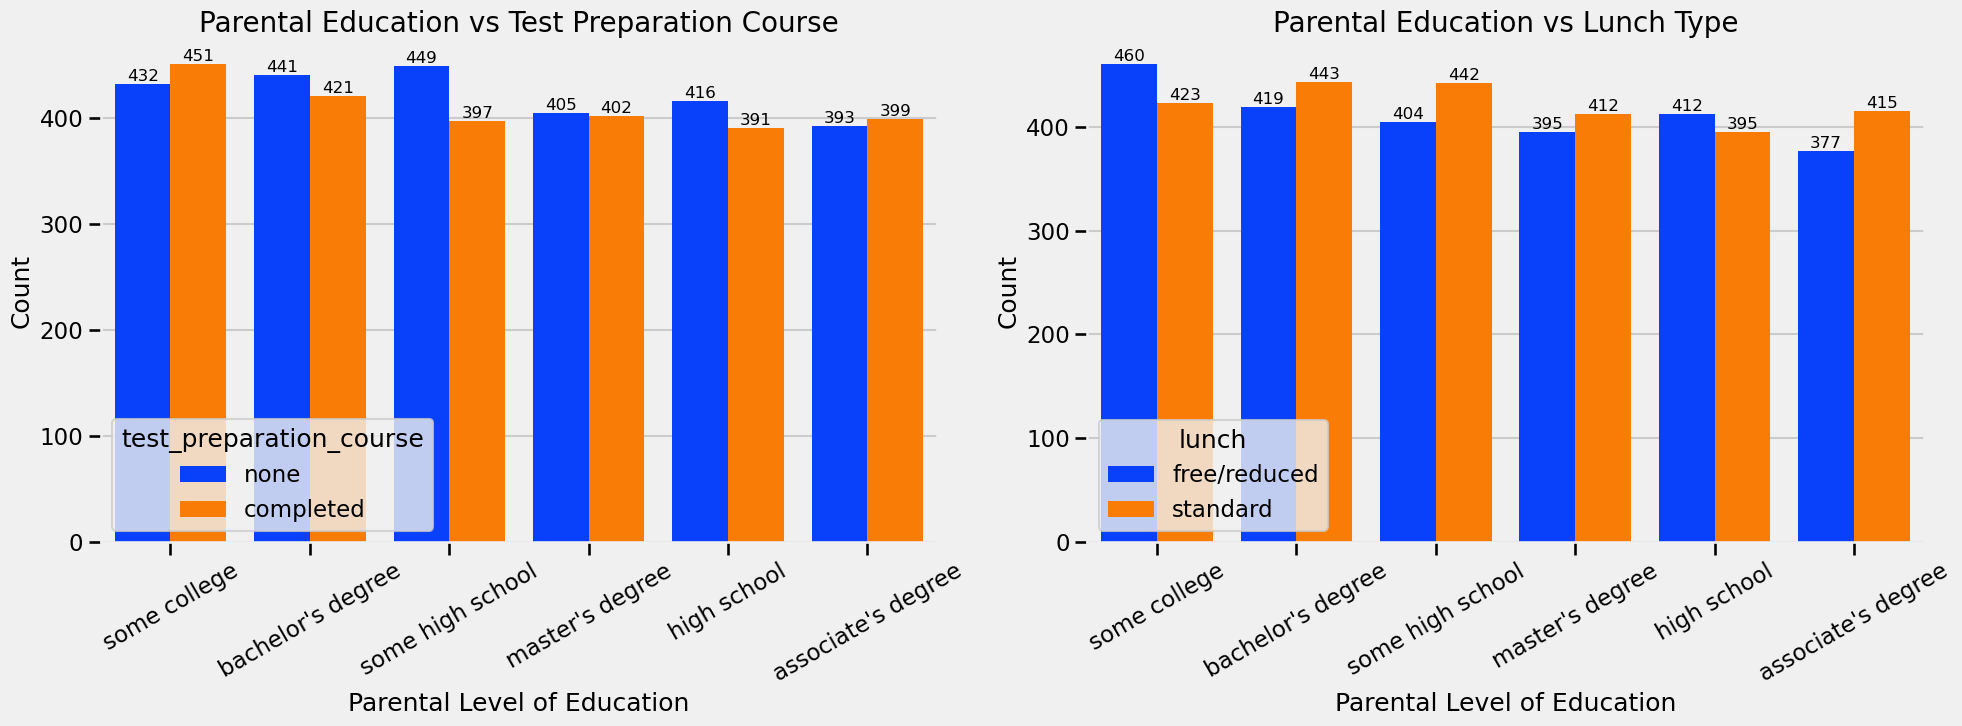

In [35]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))

# Common order for X-axis (if needed)
order = df['parental_level_of_education'].value_counts().index

# Plot 1: Test prep
sns.countplot(x='parental_level_of_education', data=df, hue='test_preparation_course',
              palette='bright', saturation=0.95, order=order, ax=ax[0])
ax[0].set_title('Parental Education vs Test Preparation Course', color='black', size=20)
ax[0].set_xlabel('Parental Level of Education')
ax[0].set_ylabel('Count')
ax[0].tick_params(axis='x', rotation=30)

for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=12, label_type='edge')

# Plot 2: Lunch
sns.countplot(x='parental_level_of_education', data=df, hue='lunch',
              palette='bright', saturation=0.95, order=order, ax=ax[1])
ax[1].set_title('Parental Education vs Lunch Type', color='black', size=20)
ax[1].set_xlabel('Parental Level of Education')
ax[1].set_ylabel('Count')
ax[1].tick_params(axis='x', rotation=30)

for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=12, label_type='edge')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


#### Insights
- Across all parental education levels, a higher number of students did not enroll in a test preparation course compared to those who completed one.
- For most parental education levels, the number of students receiving 'standard' lunch is greater than or comparable to the number of students receiving 'free/reduced' lunch.

#### 4.4.5 TEST PREPARATION COURSE COLUMN 
- Which type of lunch is most common amoung students ?
- Is Test prepration course has any impact on student's performance ?

#### BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

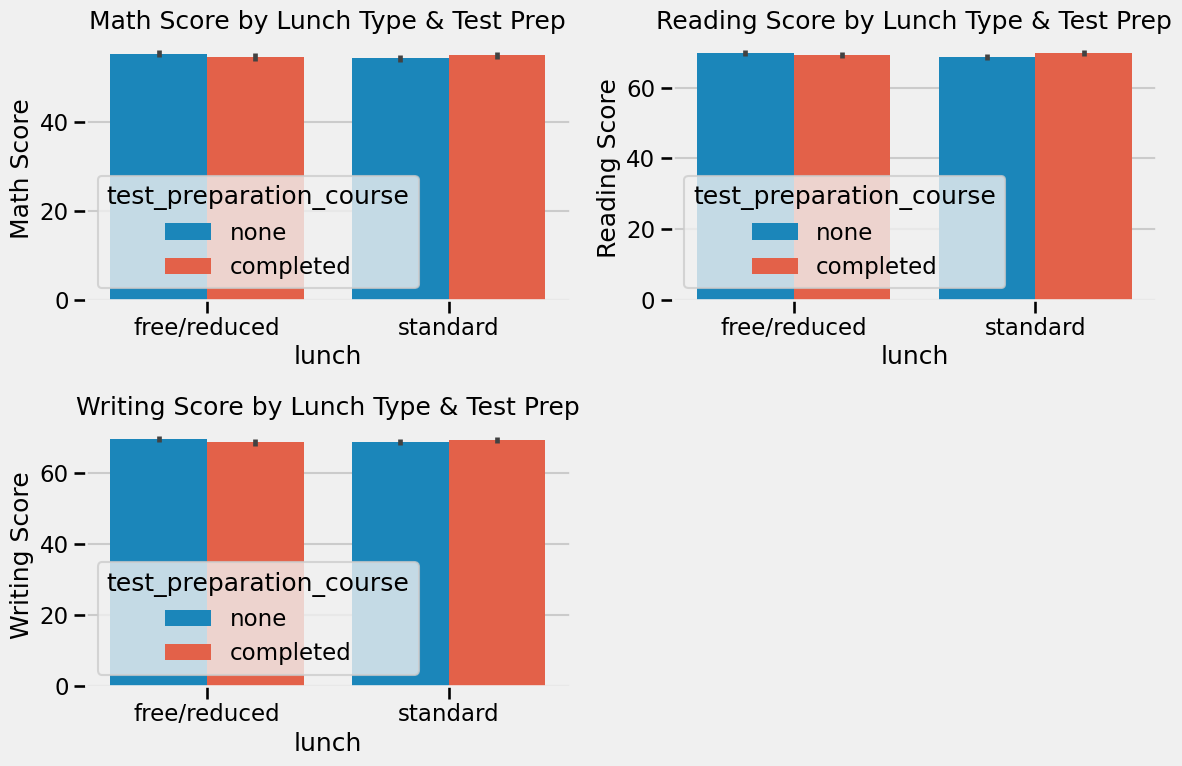

In [36]:
plt.figure(figsize=(12, 8))

# Math Score
plt.subplot(2, 2, 1)
sns.barplot(x='lunch', y='math_score', hue='test_preparation_course', data=df)
plt.title("Math Score by Lunch Type & Test Prep")
plt.ylabel("Math Score")

# Reading Score
plt.subplot(2, 2, 2)
sns.barplot(x='lunch', y='reading_score', hue='test_preparation_course', data=df)
plt.title("Reading Score by Lunch Type & Test Prep")
plt.ylabel("Reading Score")

# Writing Score
plt.subplot(2, 2, 3)
sns.barplot(x='lunch', y='writing_score', hue='test_preparation_course', data=df)
plt.title("Writing Score by Lunch Type & Test Prep")
plt.ylabel("Writing Score")

plt.tight_layout()
plt.show()

#### Insights
- Students who completed the test preparation course consistently achieved higher average scores across all three subjects (Math, Reading, and Writing) compared to those who did not take the course, irrespective of their lunch type. This suggests a positive impact of test preparation on academic performance.

#### 4.4.6 CHECKING OUTLIERS

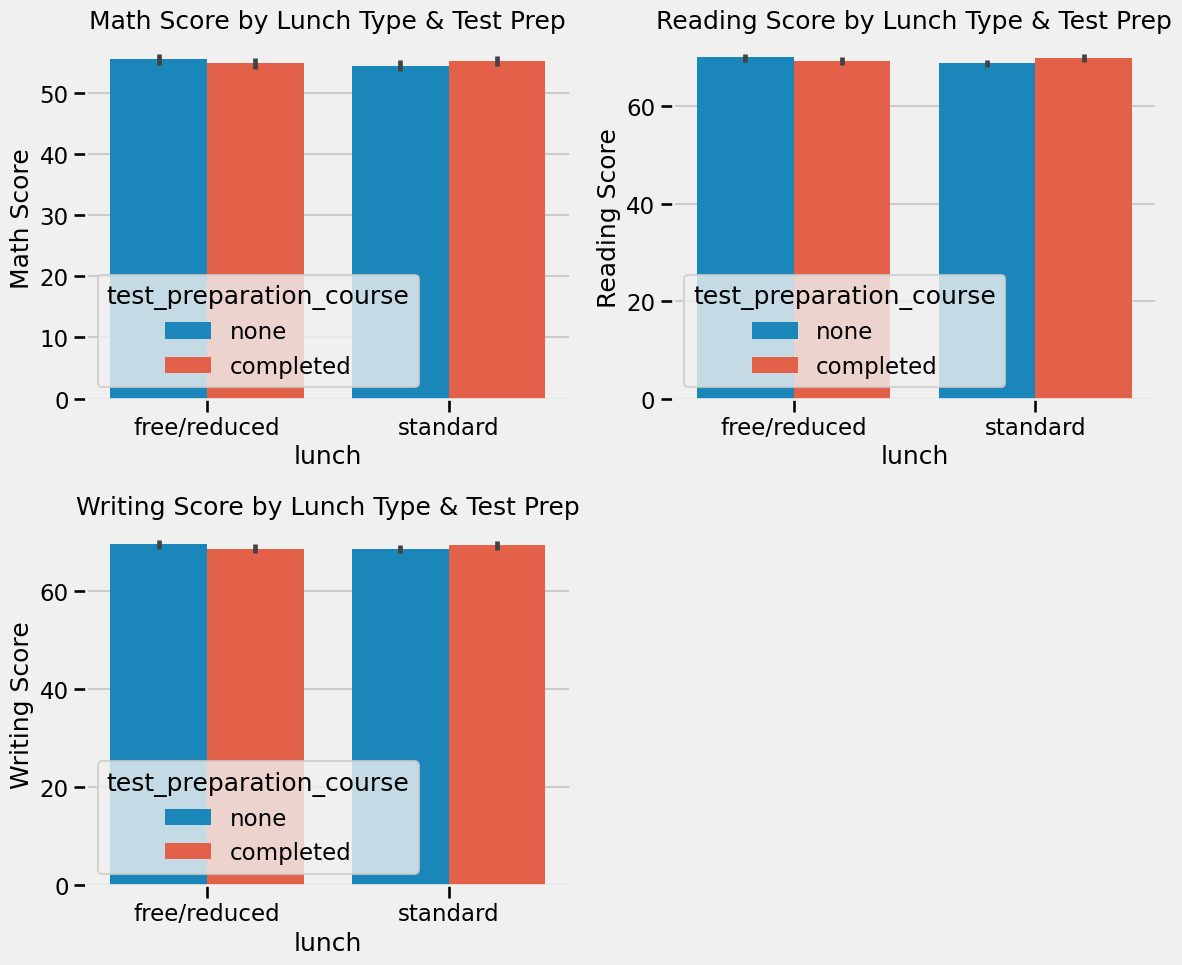

In [37]:
plt.figure(figsize=(12, 10))

# Math Score
plt.subplot(2, 2, 1)
sns.barplot(x='lunch', y='math_score', hue='test_preparation_course', data=df)
plt.title("Math Score by Lunch Type & Test Prep")
plt.ylabel("Math Score")

# Reading Score
plt.subplot(2, 2, 2)
sns.barplot(x='lunch', y='reading_score', hue='test_preparation_course', data=df)
plt.title("Reading Score by Lunch Type & Test Prep")
plt.ylabel("Reading Score")

# Writing Score
plt.subplot(2, 2, 3)
sns.barplot(x='lunch', y='writing_score', hue='test_preparation_course', data=df)
plt.title("Writing Score by Lunch Type & Test Prep")
plt.ylabel("Writing Score")

plt.tight_layout()
plt.show()

#### Insights
- Students who completed the test preparation course tend to have slightly higher average scores across Math, Reading, and Writing, regardless of their lunch type (free/reduced or standard).
- While there's an observable trend of higher scores for those who completed the test preparation, the differences in average scores between those who completed and those who did not, within each lunch category, appear to be relatively small.

#### 4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

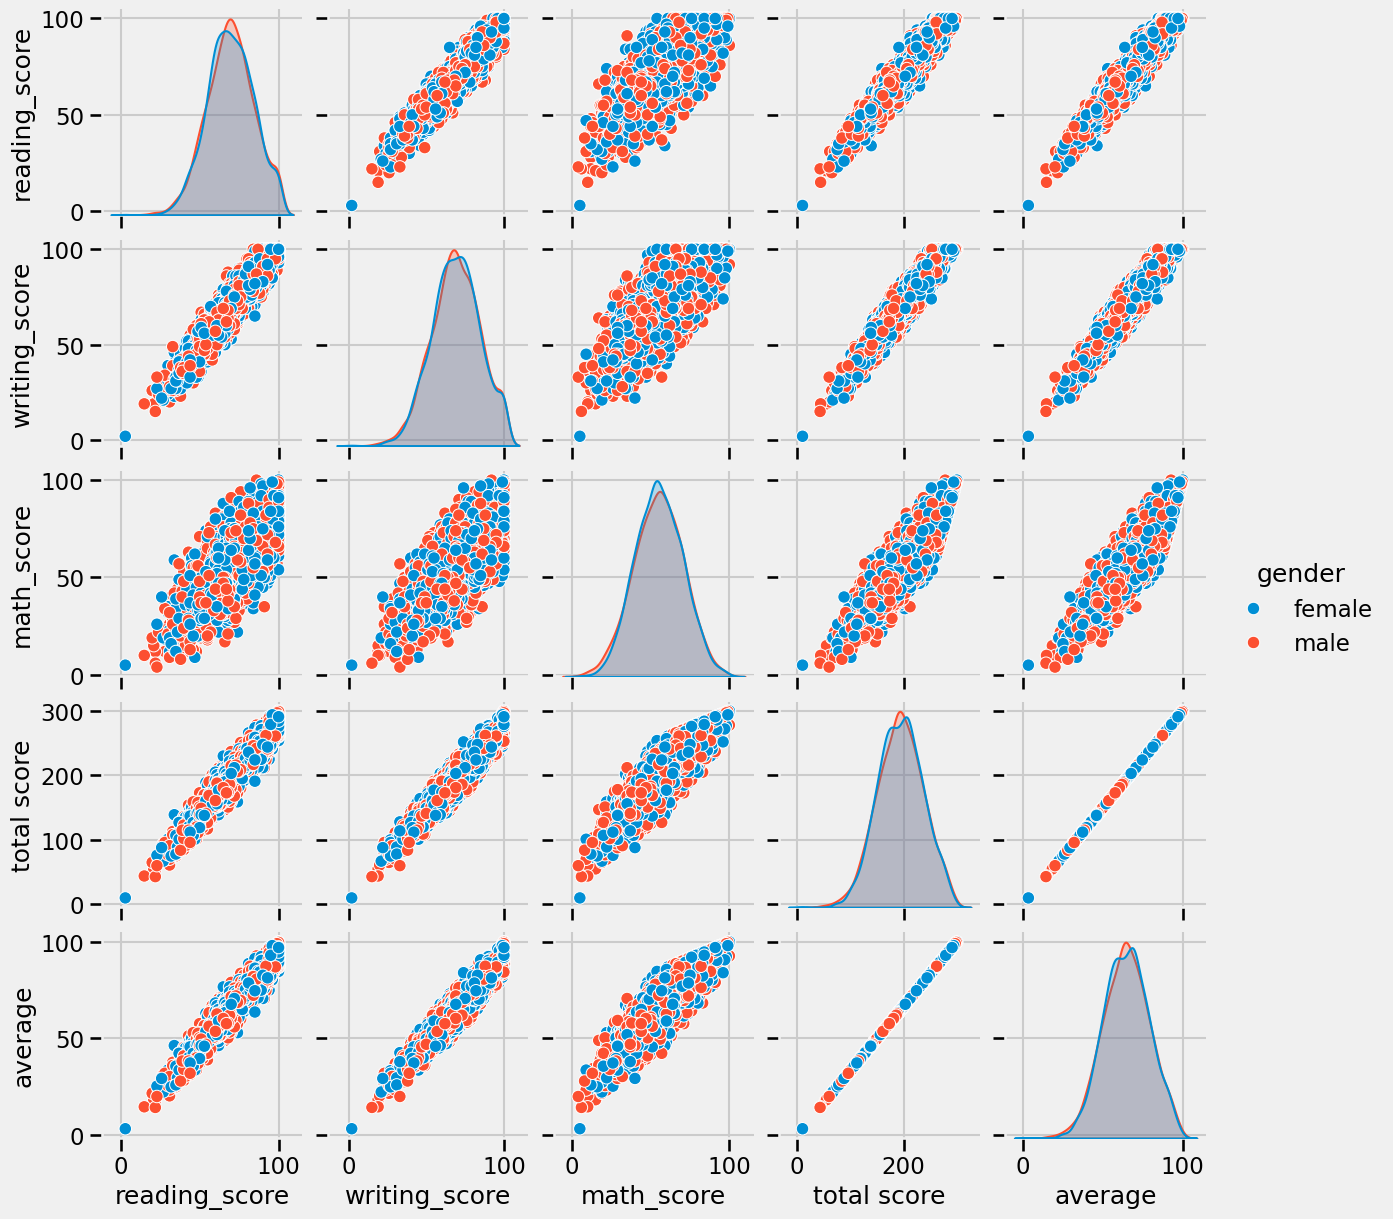

In [38]:
sns.pairplot(df,hue = 'gender')
plt.show()

#### Insights
- There is a strong positive linear correlation between all the different scores (reading, writing, math, total, and average). As a student's score in one subject or metric increases, their scores in the others also tend to increase proportionally.
- The diagonal plots show the distribution of each score. For 'reading_score', 'writing_score', 'math_score', and 'average', the distributions appear roughly bell-shaped, peaking around the mid-to-high range. 'Total_score' also shows a similar bell-shaped distribution.
- When observing the scatter plots colored by gender, both male (orange) and female (blue) students are distributed across the range of scores, indicating that both genders participate across the performance spectrum.

### Conclusions

Based on the analysis of the provided visualizations, the following conclusions can be drawn regarding student performance:

- **Impact of Socio-Demographic Factors:** Student performance is significantly influenced by factors such as **lunch type, race/ethnicity, and parental level of education**. Specifically, students with a standard lunch, from certain racial/ethnic groups (e.g., Group E and Group D), and those with parents possessing higher educational qualifications (e.g., master's or bachelor's degrees) generally exhibit higher average scores.

- **Gender Performance:** In this dataset, **female students demonstrate a slightly higher average performance** in overall scores and specific subjects like mathematics, contrary to the common misconception that males universally lead in these areas.

- **Benefit of Test Preparation:** Completing a **test preparation course has a clear positive impact on student scores**. Students who undertook such courses consistently achieved higher average scores across all subjects, regardless of their lunch type. This indicates that test preparation is a beneficial endeavor for improving academic outcomes.

- **Correlation Among Scores:** All academic scores (math, reading, writing) and derived metrics (total score, average score) show **strong positive linear correlations** with each other. This implies that a student performing well in one area is likely to perform well across other subjects.